In [2]:
# Imports + my helper functions

import sys
import os
import netCDF4 as nc
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import importlib

sys.path.append('/home/563/ls7238/code/australia_precipitation/module')
import helper_funcs
importlib.reload(helper_funcs)

<module 'helper_funcs' from '/home/563/ls7238/code/australia_precipitation/module/helper_funcs.py'>

In [3]:
# Compile list of station files

base_dir = '/g/data/k10/dl6968/BoM_gauges/netcdf/30min_acc'  
nc_files = []

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.nc'):
            nc_files.append(os.path.join(root, file))

In [4]:
#  Call my metadata function:
stations_df = helper_funcs.read_stations_metadata(nc_files)

stations_df

,Station Number,Station Name,State,Latitude,Longitude,Start Year,End Year,Percentage Complete (from file),Record Length
0,068241,ALBION PARK (SHELLHARBOUR AIRPORT),NSW,-34.5639,150.7924,1999,2024,83.0,26
1,061366,NORAH HEAD AWS,NSW,-33.2814,151.5766,1989,2024,80.0,36
2,069128,NERRIGA AWS,NSW,-35.1103,150.0826,2013,2024,99.0,12
3,065070,DUBBO AIRPORT AWS,NSW,-32.2206,148.5753,1989,2024,67.0,36
4,048244,COBAR COMPARISON,NSW,-31.4861,145.8281,2000,2000,60.0,1
...,...,...,...,...,...,...,...,...,...
635,014310,OENPELLI AIRPORT,NT,-12.3272,133.0069,2012,2024,97.0,13
636,015135,TENNANT CREEK AIRPORT,NT,-19.6423,134.1833,1990,2024,72.0,35
637,014704,MCARTHUR RIVER MINE AIRPORT,NT,-16.4423,136.0760,2003,2024,81.0,22
638,014309,MURGANELLA AIRSTRIP,NT,-11.5485,132.9266,2012,2024,97.0,13


In [5]:
# Pulling out just the stations that have 30 year records and grouping them by state:

longstations_statedict = {}

for _, row in stations_df.iterrows():
    if row["Record Length"] > 29:
        state = row["State"]
        station_number = row["Station Number"]

        if state not in longstations_statedict:
            longstations_statedict[state] = []
        longstations_statedict[state].append(station_number)

print(longstations_statedict)


{'NSW': ['061366', '065070', '069132', '053115', '066037', '200839', '069139', '058208', '062101', '200288', '061363', '061078', '063291', '069138', '063292', '047048', '068192', '058198', '048237', '062100', '067105', '061260', '073138', '066137', '048027', '070217', '055325', '072150', '072160', '061375', '068228', '070330', '056238', '050137', '070328'], 'TAS': ['094087', '092045', '094029', '091126', '099005', '094008', '097083', '091107', '098017', '097072'], 'ANT': ['300000'], 'QLD': ['033045', '200283', '029127', '040842', '033119', '039083', '044021', '040068', '039123', '032040', '040211', '040004', '036031', '040764', '040717', '033294', '041359', '040861', '027058', '027045', '031011'], 'VIC': ['076031', '085291', '088051', '084144', '084142', '090180', '090173', '083084', '083024', '081123', '086077', '084084', '085072', '090171', '088162', '085296', '090015', '083085', '086361', '082139', '082138', '090175', '087031', '087168', '088164', '084143', '087113', '086282', '0863

In [6]:
# Calling rain dataframe function - investiage a small state first to make sure working:

# Set min rain to remove rows where no rain for hours
tas30yr_df = helper_funcs.build_rain_dataframe(stations=longstations_statedict["TAS"], nc_dir='/g/data/k10/dl6968/BoM_gauges/netcdf/30min_acc/TAS', 
                              state_abbrev="TAS", min_rain=0.01)

tas30yr_df

,094087,092045,094029,091126,099005,094008,097083,091107,098017,097072
1994-09-10 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN
1994-09-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN
1994-09-11 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN
1994-09-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN
1994-09-11 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-07-15 04:00:00,42.4,21.4,12.8,NaN,10.8,NaN,2.2,NaN,2.4,NaN
2024-07-15 04:30:00,44.2,21.8,12.8,NaN,13.2,NaN,2.8,NaN,2.8,NaN
2024-07-15 05:00:00,47.2,21.8,12.8,NaN,13.8,NaN,4.0,NaN,2.8,NaN
2024-07-15 05:30:00,48.8,21.8,12.8,NaN,15.2,NaN,5.2,NaN,2.8,NaN


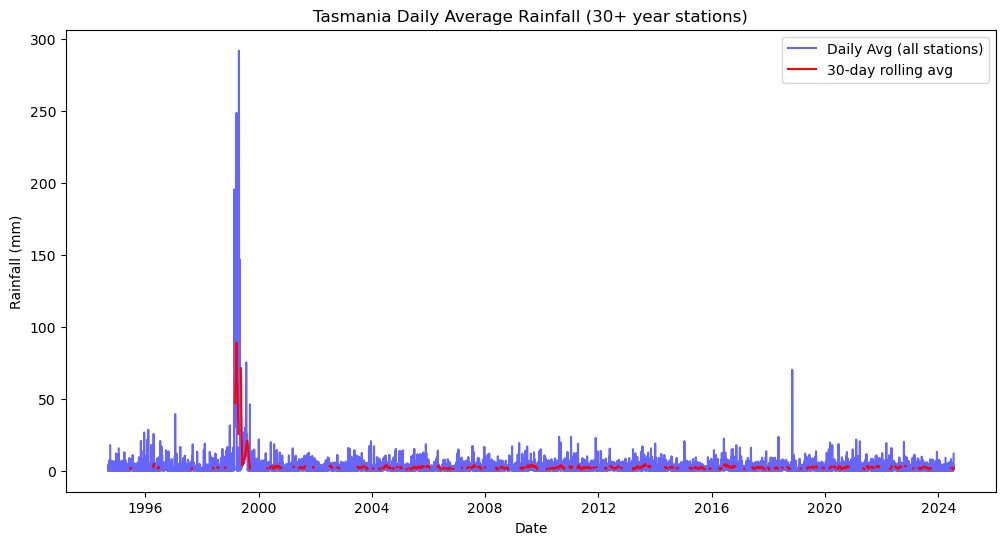

In [7]:
# Plotting the daily means as a time series:

# Resample to daily means per station
tas_daily = tas30yr_df.resample('D').mean()

# Average across all stations for each day
tas_daily_avg = tas_daily.mean(axis=1)

plt.figure(figsize=(12,6))
plt.plot(tas_daily_avg.index, tas_daily_avg.values, color='blue', alpha=0.6, label="Daily Avg (all stations)")

# Rolling 30-day smoother
plt.plot(tas_daily_avg.index, tas_daily_avg.rolling(30).mean(), color='red', label="30-day rolling avg")

plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Tasmania Daily Average Rainfall (30+ year stations)')
plt.legend()
plt.savefig('Tasmania daily averages.png')
plt.show()


In [8]:
# Now looking for values above the 95th percentile:

# Flatten all values into a single array, ignoring NaNs
tas_all_values = tas30yr_df.values.flatten()
tas_all_values = tas_all_values[~np.isnan(tas_all_values)]

# 95th percentile threshold
threshold_95 = np.percentile(tas_all_values, 95)
print(f"Half-hourly 95th percentile rainfall: {threshold_95:.2f} mm")

# Make df of just the extreme events
tas_extreme_mask = tas30yr_df > threshold_95
tas_extreme_events = tas30yr_df.where(tas_extreme_mask)

tas_extreme_events

Half-hourly 95th percentile rainfall: 14.80 mm


,094087,092045,094029,091126,099005,094008,097083,091107,098017,097072
1994-09-10 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-09-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-09-11 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-09-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-09-11 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-07-15 04:00:00,42.4,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-15 04:30:00,44.2,21.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-15 05:00:00,47.2,21.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-15 05:30:00,48.8,21.8,NaN,NaN,15.2,NaN,NaN,NaN,NaN,NaN


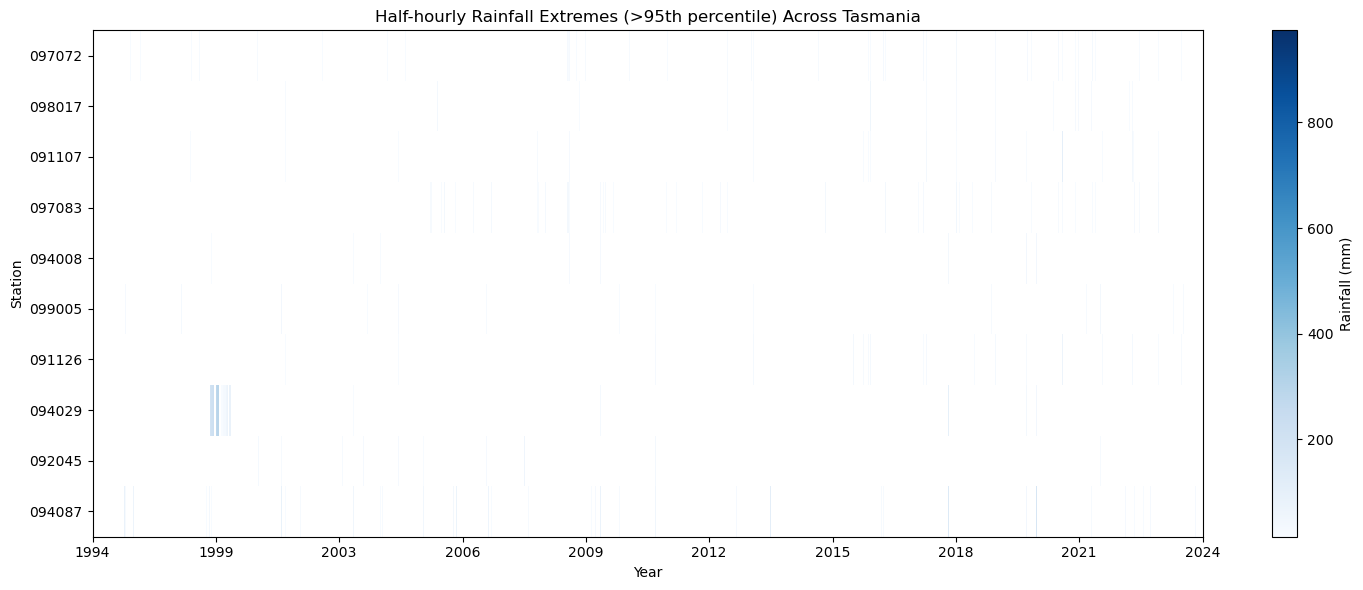

In [14]:
# plotting the extremes in a heat map style table

plt.figure(figsize=(15,6))
im = plt.imshow(
    tas_extreme_events.T, 
    aspect='auto',
    interpolation='none',
    cmap='Blues',
    origin='lower',
    #vmin = 0,
    #vmax = 100
)

# X-axis as dates
xticks_num = 10
xticks = np.linspace(0, tas_extreme_events.shape[0]-1, xticks_num, dtype=int)
xtick_labels = tas_extreme_events.index[xticks].year  # get year for label

plt.xticks(ticks=xticks, labels=xtick_labels)
plt.xlabel('Year')
plt.ylabel('Station')
plt.yticks(ticks=np.arange(len(tas_extreme_events.columns)), labels=tas_extreme_events.columns)
plt.colorbar(im, label='Rainfall (mm)')
plt.title('Half-hourly Rainfall Extremes (>95th percentile) Across Tasmania')
plt.tight_layout()
plt.savefig('Tasmania extremes timeseries.png')
plt.show()



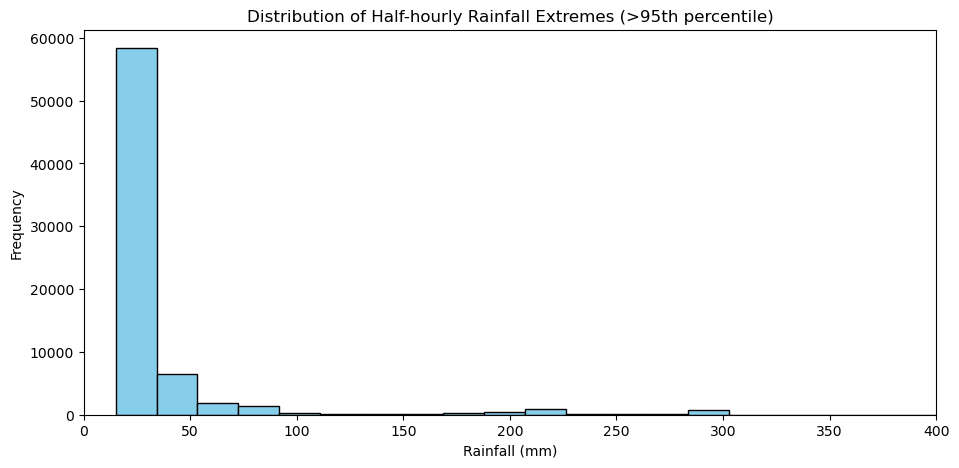

In [10]:
# Histogram for frequency of extreme events:


extreme_values = tas_extreme_events.values.flatten()
extreme_values = extreme_values[extreme_values > 0]  # ignore zeros

plt.figure(figsize=(11,5))
plt.hist(extreme_values, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Rainfall (mm)')
plt.xlim(0, 400)
plt.ylabel('Frequency')
plt.title('Distribution of Half-hourly Rainfall Extremes (>95th percentile)')
plt.show()

In [ ]:

# Turning into test set on tassie into functions:

In [11]:
# Function to plot daily means:

def plot_daily_mean_timeseries(data_df, figure_title):
    '''
    Function plots daily average rainfall as a timeseries
    
    Arguments: 
    data_df - a pandas df which contains the rainfall timeseries for a set of station numbers
    figure_title - a string with the title for the figure

    '''

    # Turn 30 min values into daily then average across all stations
    daily_rain = data_df.resample('D').mean()
    daily_avg = daily_rain.mean(axis=1)
    
    # Plot as a timeseries
    fig, ax = plt.subplots(figsize=(11,5))
    ax.plot(daily_avg.index, daily_avg.values, color='blue', alpha=0.6, label="Daily Avg (all stations)")

    # Rolling 30-day smoother
    ax.plot(daily_avg.index, daily_avg.rolling(30).mean(), color='red', label="30-day rolling avg")

    ax.set_xlabel('Date')
    ax.set_ylabel('Rainfall (mm)')
    ax.set_title(figure_title)
    ax.legend()
    
    return fig, ax


In [12]:
# Function for making a df of the extreme values:

def create_extreme_df(data_df, percentile_value = 95):
    '''
    Arguments: 
    data_df - a pandas df containing rainfall timeseries for a list of stations
    percentile_value - int, the percentile being looked at, default 95
    '''

    all_values = data_df.values.flatten()
    all_values = all_values[~np.isnan(all_values)]
    
    threshold = np.percentile(all_values, percentile_value)

    extreme_mask = data_df > threshold
    extreme_df = data_df.where(extreme_mask)

    return extreme_df


In [13]:
# Running Victoria through my functions:

vic30yr_df = helper_funcs.build_rain_dataframe(stations=longstations_statedict["VIC"], nc_dir='/g/data/k10/dl6968/BoM_gauges/netcdf/30min_acc/VIC', 
                              state_abbrev="VIC", min_rain=0.01)

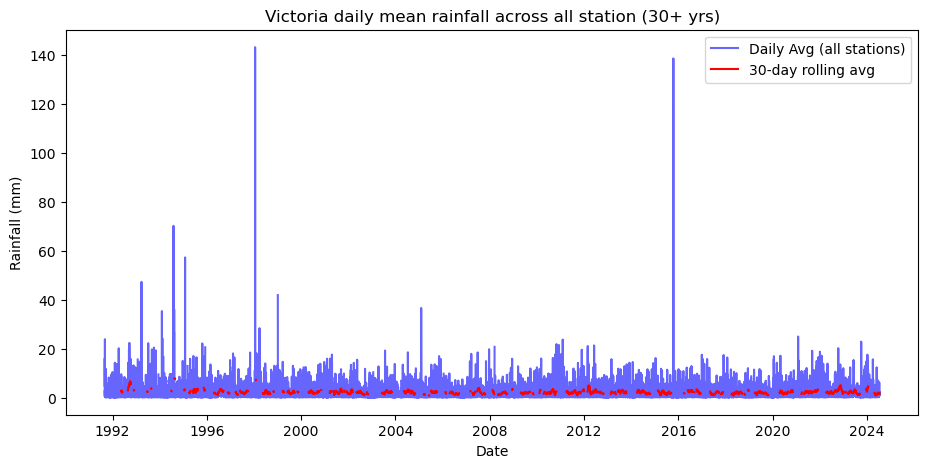

In [16]:
fig, ax = plot_daily_mean_timeseries(vic30yr_df, figure_title = 'Victoria daily mean rainfall across all station (30+ yrs)')

In [18]:
vic_extremes = create_extreme_df(vic30yr_df, percentile_value = 95)

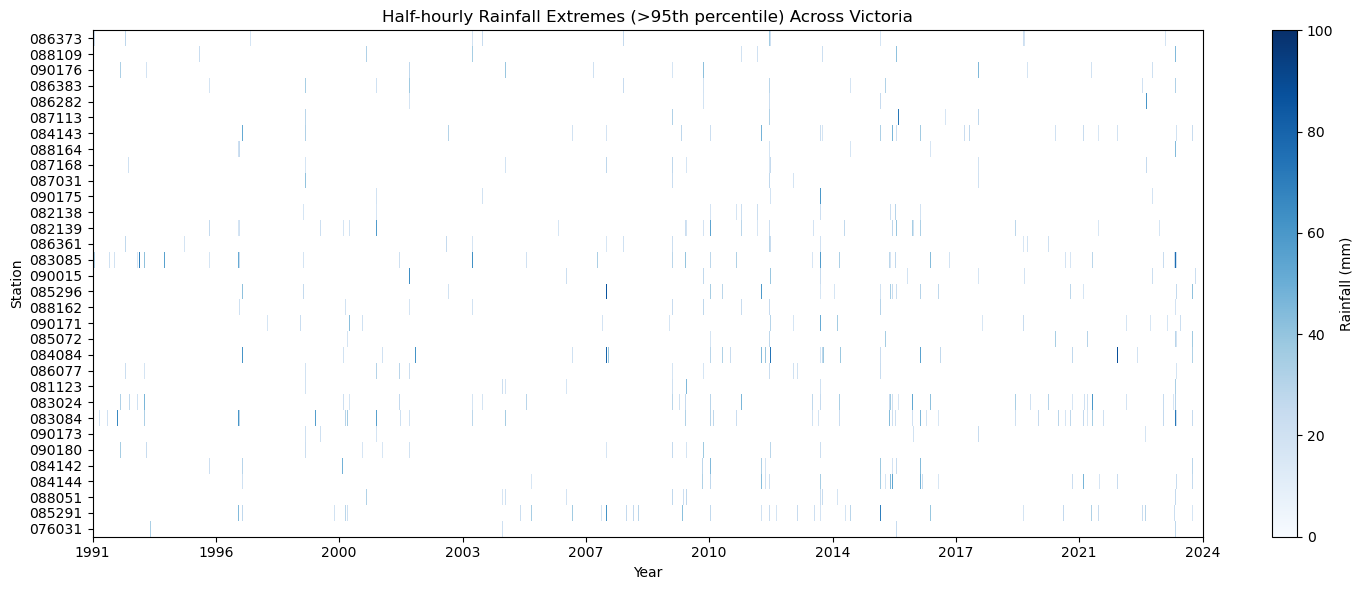

In [ ]:
# plotting the extremes in a heat map style table

plt.figure(figsize=(15,6))
im = plt.imshow(
    vic_extremes.T, 
    aspect='auto',
    interpolation='none',
    cmap='Blues',
    origin='lower',
    vmin = 0,
    vmax = 100
)

# X-axis as dates
xticks_num = 10
xticks = np.linspace(0, vic_extremes.shape[0]-1, xticks_num, dtype=int)
xtick_labels = vic_extremes.index[xticks].year  # get year for label

plt.xticks(ticks=xticks, labels=xtick_labels)
plt.xlabel('Year')
plt.ylabel('Station')
plt.yticks(ticks=np.arange(len(vic_extremes.columns)), labels=vic_extremes.columns)
plt.colorbar(im, label='Rainfall (mm)')
plt.title('Half-hourly Rainfall Extremes (>95th percentile) Across Victoria')
plt.tight_layout()
plt.show()

In [ ]:

# Count extreme events per station
extreme_counts_per_station = (tas_extreme_events > 0).sum(axis=0)

# Filter metadata to only the stations in extremes DataFrame
station_meta_extremes = stations_df.set_index('Station Number').loc[extreme_counts_per_station.index]


plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([144.5, 148.5, -44.0, -40.5], crs=ccrs.PlateCarree())  # Tasmania bounding box

ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, facecolor='white', alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Scatter stations, colored by number of extreme events
sc = ax.scatter(
    station_meta_extremes['Longitude'],
    station_meta_extremes['Latitude'],
    c=extreme_counts_per_station.values,
    cmap='Reds',
    s=100,
    edgecolor='k',
    transform=ccrs.PlateCarree()
)

# Colorbar
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.6)
cbar.set_label('Number of Half-hourly Extreme Events (>95th percentile)')

plt.title('Tasmania: Extreme Half-hourly Rainfall Events per Station')
plt.show()


/home/563/ls7238/miniconda3/envs/test/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


URLError: <urlopen error [Errno 101] Network is unreachable>

<Figure size 1000x1000 with 2 Axes>